# List Functions

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `SortInPlace`
Sort a list of $\ell$ numbers in place using $\ell \log \ell$ ancilla bits.

Applies the map:
$$
    |x_1, x_2, \ldots, x_l\rangle
    |0^{\ell \log \ell}\rangle
    \mapsto
    |x_{\pi_1}, x_{\pi_2}, \ldots, x_{\pi_\ell})\rangle
    |\pi_1, \pi_2, \ldots, \pi_\ell\rangle
$$
where $x_{\pi_1} \le x_{\pi_2} \ldots \le x_{\pi_\ell}$ is the sorted list,
and the ancilla are entangled.

To apply this, we first use any sorting algorithm to output the sorted list
in a clean register. And then use the following algorithm from Lemma 4.12 of Ref [1]
that applies the map:

$$
    |x_1, ..., x_l\rangle|x_{\pi(1)}, ..., x_{\pi(l)})\rangle
    \mapsto
    |x_l, ..., x_l\rangle|\pi(1), ..., \pi(l))\rangle
$$

where $x_i \in [n]$ and $\pi(i) \in [l]$.
This second algorithm (Lemma 4.12) has two steps, each with $l^2$ comparisons:
1. compute `pi(1) ... pi(l)` given `x_1 ... x_l` and `x_{pi(1)} ... x{pi(l)}`.
1. (un)compute `x_{pi(1)} ... x{pi(l)}` using `pi(1) ... pi(l)` given `x_1 ... x_l`.

#### Parameters
 - `l`: number of elements in the list
 - `dtype`: type of each element to store `[n]`. 

#### Registers
 - `input`: the entire input as a single register
 - `ancilla`: the generated (entangled) register storing `pi`. 

#### References
 - [Quartic quantum speedups for planted inference](https://arxiv.org/abs/2406.19378v1). Lemma 4.12. Eq. 122.


In [2]:
from qualtran.bloqs.arithmetic.lists import SortInPlace

## `SymmetricDifference`
Given two sorted sets $S, T$ of unique elements, compute their symmetric difference.

This accepts an integer `n_diff`, and marks a flag qubit if the symmetric difference
set is of size exactly `n_diff`. If the flag is marked (1), then the output of `n_diff`
numbers is the symmetric difference, otherwise it may be arbitrary.

#### Parameters
 - `n_lhs`: number of elements in $S$
 - `n_rhs`: number of elements in $T$
 - `n_diff`: expected number of elements in the difference $S \Delta T$.
 - `dtype`: type of each element. 

#### Registers
 - `S`: list of `n_lhs` numbers.
 - `T`: list of `n_rhs` numbers.
 - `diff`: output register of `n_diff` numbers.
 - `flag`: 1 if there are duplicates, 0 if all are unique. 

#### References
 - [Quartic quantum speedups for planted inference](https://arxiv.org/abs/2406.19378v1). Theorem 4.17, proof para 3, page 38.


In [3]:
from qualtran.bloqs.arithmetic.lists import SymmetricDifference

### Example Instances

In [4]:
dtype = QUInt(4)
symm_diff = SymmetricDifference(n_lhs=4, n_rhs=2, n_diff=4, dtype=dtype)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([symm_diff],
           ['`symm_diff`'])

### Call Graph

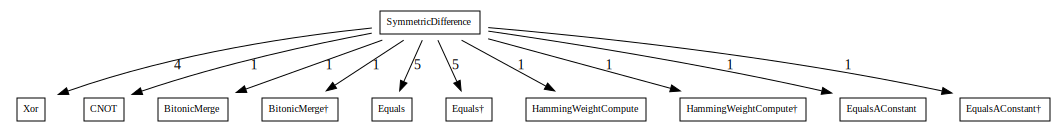

#### Counts totals:
 - `BitonicMerge`: 1
 - `BitonicMerge†`: 1
 - `CNOT`: 1
 - `EqualsAConstant`: 1
 - `EqualsAConstant†`: 1
 - `Equals`: 5
 - `Equals†`: 5
 - `HammingWeightCompute`: 1
 - `HammingWeightCompute†`: 1
 - `Xor`: 4

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
symm_diff_g, symm_diff_sigma = symm_diff.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(symm_diff_g)
show_counts_sigma(symm_diff_sigma)

## `HasDuplicates`
Given a sorted list of `l` numbers, check if it contains any duplicates.

Produces a single qubit which is `1` if there are duplicates, and `0` if all are disjoint.
It compares every adjacent pair, and therefore uses `l - 1` comparisons.
It then uses a single MCX on `l - 1` bits gate to compute the flag.

#### Parameters
 - `l`: number of elements in the list
 - `dtype`: type of each element to store `[n]`. 

#### Registers
 - `xs`: a list of `l` registers of `dtype`.
 - `flag`: single qubit. Value is flipped if the input list has duplicates, otherwise stays same. 

#### References
 - [Quartic quantum speedups for planted inference](https://arxiv.org/abs/2406.19378v1). Lemma 4.12. Eq. 122.


In [7]:
from qualtran.bloqs.arithmetic.lists import HasDuplicates

### Example Instances

In [8]:
import sympy

n = sympy.Symbol("n")
has_duplicates_symb = HasDuplicates(4, QUInt(n))

In [9]:
has_duplicates = HasDuplicates(4, QUInt(3))

#### Graphical Signature

In [10]:
from qualtran.drawing import show_bloqs
show_bloqs([has_duplicates_symb, has_duplicates],
           ['`has_duplicates_symb`', '`has_duplicates`'])

### Call Graph

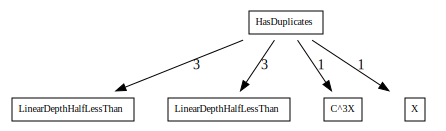

#### Counts totals:
 - `C^3X`: 1
 - `LinearDepthHalfLessThan`: 3
 - `LinearDepthHalfLessThan`: 3
 - `X`: 1

In [11]:
from qualtran.resource_counting.generalizers import ignore_split_join
has_duplicates_symb_g, has_duplicates_symb_sigma = has_duplicates_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(has_duplicates_symb_g)
show_counts_sigma(has_duplicates_symb_sigma)